In [22]:
import torch
import torch.nn as nn
from scratch_model import VisionTransformer

In [23]:
#check if we can run this code with GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


In [24]:
from train_utils import save_model, save_plots, train, validate, get_n_params

In [25]:
model_config = {
    "img_size": 32,
    "patch_size": 4,
    "in_chans": 3,
    "n_classes": 10,
    "embed_dim": 256,
    "depth": 12,
    "n_heads": 8,
    "mlp_ratio": 4.,
    "qkv_bias": True,}

In [26]:
model = VisionTransformer(**model_config).to(device)
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=256, out_features=768, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=256, out_features=256, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (norm2): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
      (mlp): MLP(
        (fc1): Linear(in_features=256, out_features=1024, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1024, out_features=256, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
  (head): Linear(in_features=256, out_features=10, bias=True

In [27]:
get_n_params(model)

9509642

In [28]:
import pickle
from torchvision.transforms import transforms
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [29]:
#import train data
with open('imbalanced_data.pkl', 'rb') as f:
    imbalanced_data = pickle.load(f)

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [30]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize([0.49139968, 0.48215841, 0.44653091], [0.26733429, 0.25643846, 0.27615047])
                                ])

train_data = [(transform(image), label) for image, label in imbalanced_data]

trainsize = int(len(imbalanced_data)*0.8)
train_set, val_set = torch.utils.data.random_split(train_data, [trainsize, 45500 - trainsize])

i = 0
j = []
for k in range(10) :
    for image ,label in val_set :
        if label == k :
            i = i + 1
    j.append(i)
    i = 0
print("différents nombres de labels selon chaque classe dans le validation set :", j)

différents nombres de labels selon chaque classe dans le validation set : [965, 1008, 1008, 84, 947, 1021, 1015, 1024, 1039, 989]


In [31]:
EPOCHS = 20
BATCH_SIZE = 128
LR = 3e-4

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

loader_kwargs = ({'num_workers' : 4, 'pin_memory': True} if torch.cuda.is_available() == True else {})
train_loader = data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, drop_last=True, **loader_kwargs)
val_loader = data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, drop_last=False, **loader_kwargs)

In [33]:
from save_best_model import SaveBestModel
save_best_model = SaveBestModel()

[INFO]: Epoch 1 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.16it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.34it/s]


Training loss: 1.698, training acc: 36.379
Validation loss: 1.465, validation acc: 46.604

Best validation loss: 1.464590580927001

Saving best model for epoch: 1

--------------------------------------------------
[INFO]: Epoch 2 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.23it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.63it/s]


Training loss: 1.362, training acc: 51.025
Validation loss: 1.238, validation acc: 55.945

Best validation loss: 1.2376193818118837

Saving best model for epoch: 2

--------------------------------------------------
[INFO]: Epoch 3 of 20
Training


100%|██████████| 284/284 [00:35<00:00,  8.04it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.75it/s]


Training loss: 1.160, training acc: 58.393
Validation loss: 1.092, validation acc: 61.297

Best validation loss: 1.092021187974347

Saving best model for epoch: 3

--------------------------------------------------
[INFO]: Epoch 4 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.14it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 20.51it/s]


Training loss: 1.032, training acc: 63.448
Validation loss: 1.029, validation acc: 63.505

Best validation loss: 1.0285200973351796

Saving best model for epoch: 4

--------------------------------------------------
[INFO]: Epoch 5 of 20
Training


100%|██████████| 284/284 [00:33<00:00,  8.53it/s]


Validation


100%|██████████| 72/72 [00:04<00:00, 17.57it/s]


Training loss: 0.935, training acc: 67.091
Validation loss: 1.013, validation acc: 65.077

Best validation loss: 1.0134068379799526

Saving best model for epoch: 5

--------------------------------------------------
[INFO]: Epoch 6 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.13it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.73it/s]


Training loss: 0.862, training acc: 69.816
Validation loss: 0.966, validation acc: 66.747

Best validation loss: 0.9661723789241579

Saving best model for epoch: 6

--------------------------------------------------
[INFO]: Epoch 7 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.24it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.59it/s]


Training loss: 0.778, training acc: 72.670
Validation loss: 0.967, validation acc: 67.154
--------------------------------------------------
[INFO]: Epoch 8 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.27it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 21.07it/s]


Training loss: 0.712, training acc: 75.217
Validation loss: 0.955, validation acc: 67.923

Best validation loss: 0.9550007581710815

Saving best model for epoch: 8

--------------------------------------------------
[INFO]: Epoch 9 of 20
Training


100%|██████████| 284/284 [00:30<00:00,  9.20it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 21.85it/s]


Training loss: 0.650, training acc: 77.206
Validation loss: 0.965, validation acc: 67.374
--------------------------------------------------
[INFO]: Epoch 10 of 20
Training


100%|██████████| 284/284 [00:30<00:00,  9.20it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 22.70it/s]


Training loss: 0.583, training acc: 79.805
Validation loss: 0.959, validation acc: 68.923
--------------------------------------------------
[INFO]: Epoch 11 of 20
Training


100%|██████████| 284/284 [00:28<00:00,  9.81it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 22.58it/s]


Training loss: 0.526, training acc: 81.772
Validation loss: 0.939, validation acc: 69.231

Best validation loss: 0.9385563631852468

Saving best model for epoch: 11

--------------------------------------------------
[INFO]: Epoch 12 of 20
Training


100%|██████████| 284/284 [00:29<00:00,  9.78it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 23.52it/s]


Training loss: 0.459, training acc: 84.085
Validation loss: 1.002, validation acc: 68.571
--------------------------------------------------
[INFO]: Epoch 13 of 20
Training


100%|██████████| 284/284 [00:32<00:00,  8.61it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.69it/s]


Training loss: 0.408, training acc: 85.747
Validation loss: 1.054, validation acc: 68.407
--------------------------------------------------
[INFO]: Epoch 14 of 20
Training


100%|██████████| 284/284 [00:35<00:00,  8.05it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.51it/s]


Training loss: 0.352, training acc: 87.698
Validation loss: 1.141, validation acc: 68.352
--------------------------------------------------
[INFO]: Epoch 15 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.12it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.60it/s]


Training loss: 0.305, training acc: 89.365
Validation loss: 1.173, validation acc: 68.418
--------------------------------------------------
[INFO]: Epoch 16 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.19it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.41it/s]


Training loss: 0.275, training acc: 90.409
Validation loss: 1.175, validation acc: 68.242
--------------------------------------------------
[INFO]: Epoch 17 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.27it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.83it/s]


Training loss: 0.231, training acc: 91.975
Validation loss: 1.238, validation acc: 68.220
--------------------------------------------------
[INFO]: Epoch 18 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.21it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.77it/s]


Training loss: 0.212, training acc: 92.508
Validation loss: 1.243, validation acc: 68.055
--------------------------------------------------
[INFO]: Epoch 19 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.25it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.83it/s]


Training loss: 0.191, training acc: 93.275
Validation loss: 1.386, validation acc: 67.538
--------------------------------------------------
[INFO]: Epoch 20 of 20
Training


100%|██████████| 284/284 [00:34<00:00,  8.26it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.97it/s]


Training loss: 0.175, training acc: 93.959
Validation loss: 1.364, validation acc: 68.341
--------------------------------------------------
Saving final model...
TRAINING COMPLETE


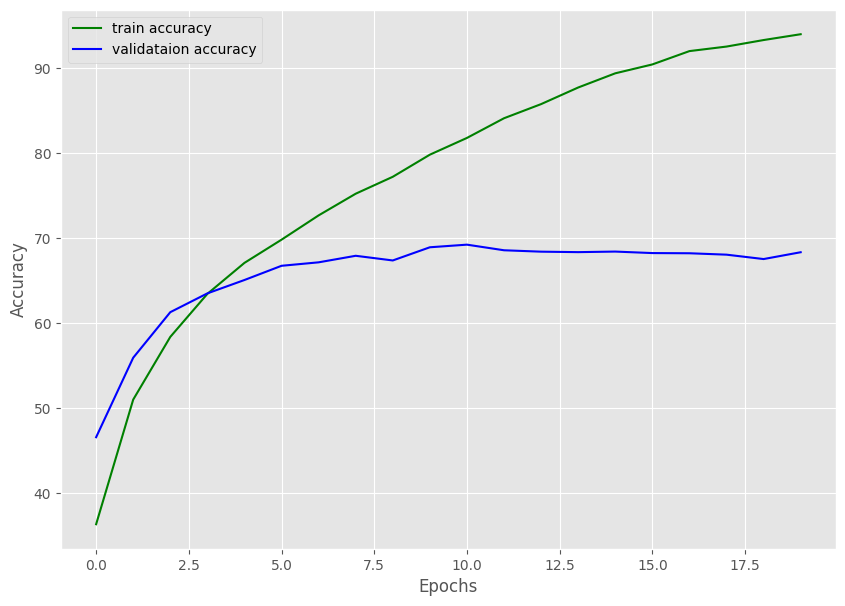

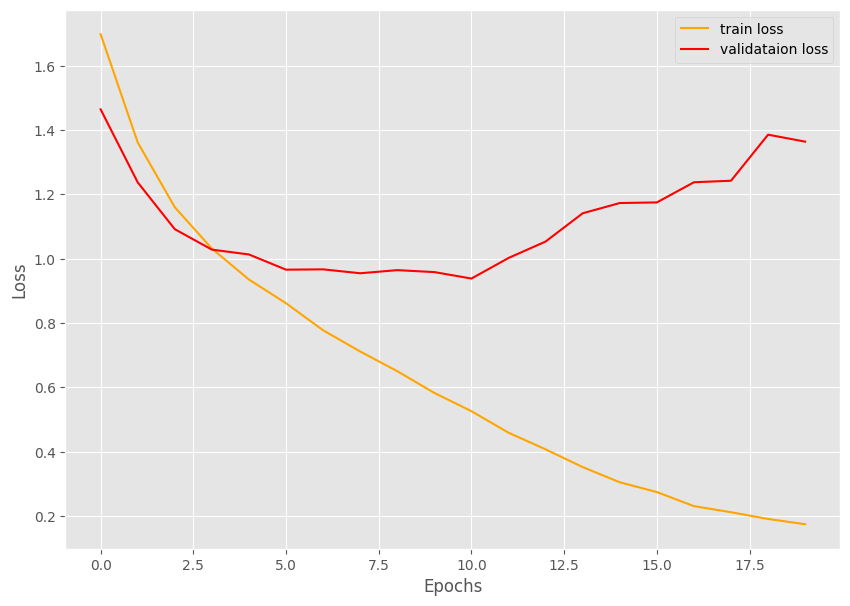

In [34]:
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# start the training
for epoch in range(EPOCHS):
    print(f"[INFO]: Epoch {epoch+1} of {EPOCHS}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                            optimizer, loss_fn)
    valid_epoch_loss, valid_epoch_acc = validate(model, val_loader,  
                                                loss_fn)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    # save the best model till now if we have the least loss in the current epoch
    save_best_model(
        valid_epoch_loss, epoch, model, optimizer, loss_fn, './models/best_model.pth'
    )
    print('-'*50)
    
# save the trained model weights for a final time
save_model(EPOCHS, model, optimizer, loss_fn, './models/final_model.pth')
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss, './models/images/')
print('TRAINING COMPLETE')

In [35]:
checkpoint = torch.load('./models/best_model.pth')

model = VisionTransformer().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss_fn = checkpoint['loss']

In [36]:
prediction = []
with torch.no_grad():
    for _,label in val_loader :
        image = _.to(device)
        pred = model(image)
        prediction.append(pred.cpu())

predicted_labels = []
for i in prediction:
    for j in i :
        predicted_labels.append(np.argmax(j.numpy()))

val_labels = []
for k,i in val_set :
    val_labels.append(i)

In [37]:
val, tot = 0, 0
for i in range(len(val_labels)):
    if val_labels[i] == predicted_labels[i]:
        val += 1
    tot +=1
print(f"Précision totale sur le set de validation: {val/tot:.2f}")

valm, totm = 0, 0
liste = []
for i in range(len(val_labels)):
    if val_labels[i] == 3:
        liste.append([predicted_labels[i]])
        if val_labels[i] == predicted_labels[i] :
            valm += 1
        totm +=1
print(f"Précision sur la classe minoritaire du set de validation: {valm/totm:.2f}")

Précision totale sur le set de validation: 0.69
Précision sur la classe minoritaire du set de validation: 0.01
